# Matrix and Vector Operations

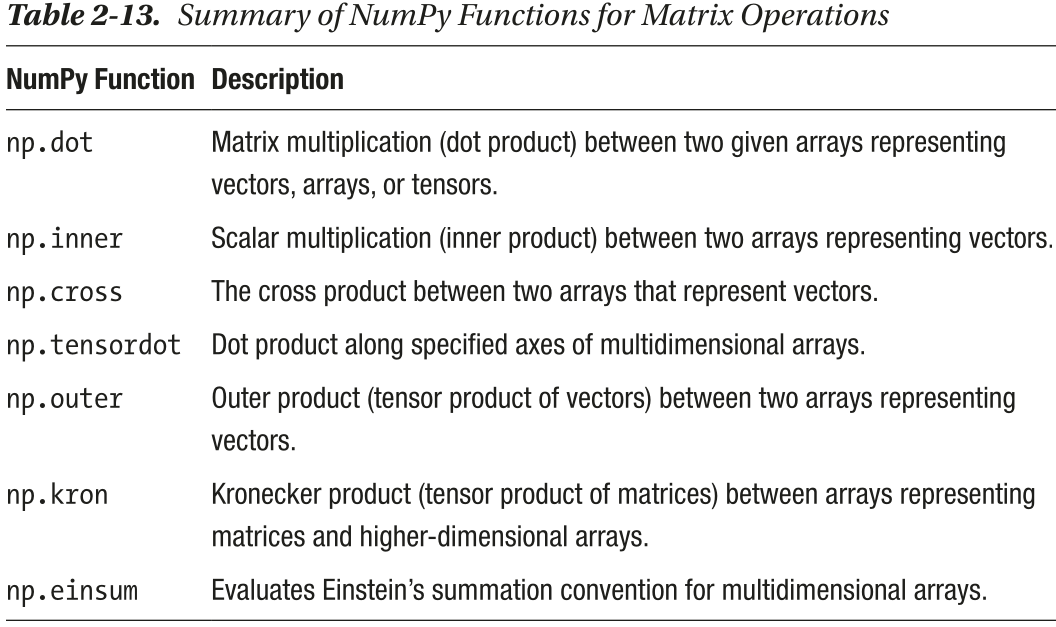

In [2]:
import numpy as np

In [3]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
B = np.arange(1, 7).reshape(3, 2)
B

array([[1, 2],
       [3, 4],
       [5, 6]])

### Dot product with np.dot

In [6]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### Dot product with @

In [7]:
A @ B

array([[22, 28],
       [49, 64]])

In [8]:
B @ A

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

### Dot product matrix with vector

In [19]:
A = np.arange(9).reshape(3, 3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
x = np.arange(3)
x

array([0, 1, 2])

In [21]:
np.dot(A, x)

array([ 5, 14, 23])

In [22]:
A.dot(x)

array([ 5, 14, 23])

In [23]:
A @ x

array([ 5, 14, 23])

Unfortunately, nontrivial matrix multiplication expressions can often become
complex and hard to read when using either np.dot or np.ndarray.dot. For example,
even a relatively simple matrix expression like the one for a similarity transform,
A′ = BAB−1, must be represented with relatively cryptic nested expressions, such as
either

In [25]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [27]:
Ap = np.dot(B, np.dot(A, np.linalg.inv(B)))
Ap

array([[-0.06044296,  0.24085735,  0.59944327],
       [ 0.65665511, -0.09368145,  0.67205785],
       [-0.13120245,  0.56203344,  1.07073066]])

In [29]:
Ap = B @ A @ np.linalg.inv(B)
Ap

array([[-0.06044296,  0.24085735,  0.59944327],
       [ 0.65665511, -0.09368145,  0.67205785],
       [-0.13120245,  0.56203344,  1.07073066]])

To improve this situation, NumPy provides an alternative data structure to
ndarray named matrix, for which expressions like A * B are implemented as matrix
multiplication
It also provides some convenient special attributes, like matrix.I for the
inverse matrix and matrix.H for the complex conjugate transpose of a matrix

In [35]:
A = np.matrix(A)
B = np.matrix(B)

Ap = B * A * B.I
Ap


matrix([[-0.06044296,  0.24085735,  0.59944327],
        [ 0.65665511, -0.09368145,  0.67205785],
        [-0.13120245,  0.56203344,  1.07073066]])

In [36]:
# The same

Ap = B @ A @ B.I
Ap

matrix([[-0.06044296,  0.24085735,  0.59944327],
        [ 0.65665511, -0.09368145,  0.67205785],
        [-0.13120245,  0.56203344,  1.07073066]])

### Vector inner product

In [38]:
np.inner(x, x)

5

In [39]:
np.dot(x, x)

5

In [40]:
x @ x

5

The main difference is that np.inner expects two input arguments with the same dimension, while np.dot can take input vectors of shape 1 × N and N × 1, respectively:

In [41]:
y = x[:, np.newaxis]
y

array([[0],
       [1],
       [2]])

In [42]:
np.dot(y.T, y)

array([[5]])

### Outer product

In [43]:
x = np.array([1, 2, 3])
np.outer(x, x)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

The outer product can also be calculated using the Kronecker product using the
function np.kron

Thus, for the case of two one-dimensional arrays of length M and P, the resulting array has
shape (M*P,)

#### Outer product with kron for vectors give long vector as a outer product

In [45]:
np.kron(x, x)

array([1, 2, 3, 2, 4, 6, 3, 6, 9])

#### Outer product from dot product

In [48]:
np.dot(x[:, np.newaxis], x[np.newaxis, :])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

### Kron example

In [52]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [53]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

#### Kron apply matrix multiplication per every item of the second array

In [54]:
np.kron(np.ones((2,2)), np.identity(2))

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

#### Swap params

In [55]:
np.kron(np.identity(2), np.ones((2,2)))

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])